In [59]:
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#           0/1     1/2  2/3     3/4   4/5              5/6          6/7
# format is station,date,measure,value,measurement flag,quality flag,source flag

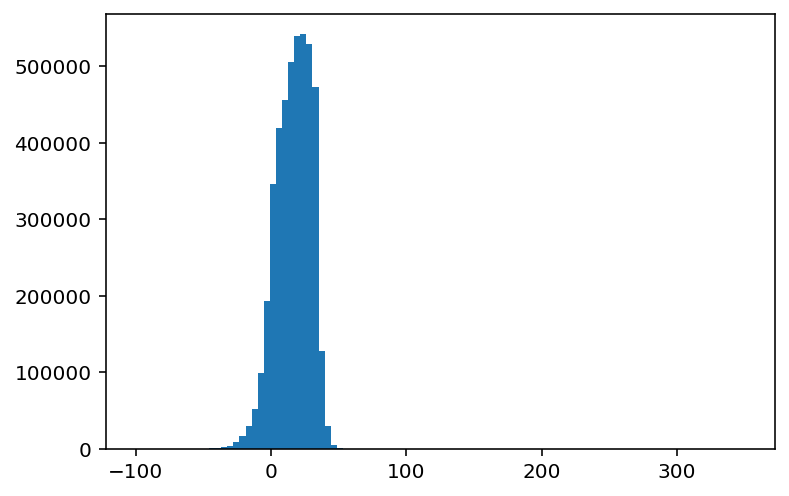

In [3]:
# _always_ check for outliers
with open('2019_TMAX.csv') as f:
    reader = csv.reader(f)
    values = [int(line[3]) / 10 for line in reader]

_ = plt.hist(values, bins=100)

In [4]:
values.sort()

In [5]:
values[:10]

[-99.9, -99.9, -99.9, -99.9, -99.9, -99.9, -99.9, -99.9, -99.9, -99.9]

In [8]:
# ah, right: -999 is "missing" maybe
!grep ,-999 2019_TMAX.csv | head

USS0033J01S,20190518,TMAX,-999,,X,T,
USS0033J01S,20190519,TMAX,-999,,X,T,
USS0033J01S,20190520,TMAX,-999,,X,T,
USS0033J01S,20190521,TMAX,-999,,X,T,
USS0033J01S,20190522,TMAX,-999,,X,T,
USS0049M08S,20190617,TMAX,-999,,X,T,
USS0049M08S,20190618,TMAX,-999,,X,T,
USS0049M08S,20190619,TMAX,-999,,X,T,
USS0049M08S,20190620,TMAX,-999,,X,T,
USS0049M08S,20190621,TMAX,-999,,X,T,


In [ ]:
# ah: quality flag is set to "X" meaning failed bounds check

In [6]:
values[-10:]

[63.9, 65.0, 67.8, 90.0, 92.6, 111.1, 111.7, 240.0, 290.0, 350.0]

In [10]:
!grep ,3500 2019_TMAX.csv | head

USC00294028,20191030,TMAX,3500,,X,H,2400


In [ ]:
# okay, so let's drop anything that fails bounds check?

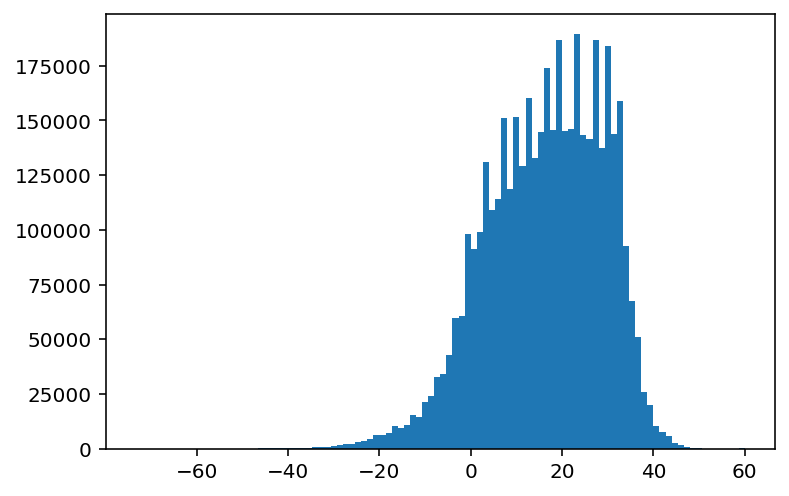

In [11]:
# _always_ check for outliers
with open('2019_TMAX.csv') as f:
    reader = csv.reader(f)
    values = [int(line[3]) / 10 for line in reader if line[5] != 'X']

_ = plt.hist(values, bins=100)

In [12]:
values.sort()

In [13]:
values[:10]

[-73.3, -73.3, -73.3, -73.3, -73.3, -73.3, -73.3, -73.3, -73.3, -73.3]

In [18]:
!grep ,-733 2019_TMAX.csv | head

USR0000AMTN,20190625,TMAX,-733,H,G,U,
USR0000AKAL,20190903,TMAX,-733,H,D,U,
USR0000AKAL,20190904,TMAX,-733,H,D,U,
USR0000AKAL,20190905,TMAX,-733,H,D,U,
USR0000AKAL,20190906,TMAX,-733,H,D,U,
USR0000AKAL,20190907,TMAX,-733,H,D,U,
USR0000AKAL,20190908,TMAX,-733,H,D,U,
USR0000AKAL,20190909,TMAX,-733,H,D,U,
USR0000AKAL,20190910,TMAX,-733,H,D,U,
USR0000AKAL,20190911,TMAX,-733,H,D,U,


In [ ]:
# 'G' means failed gap check, whatever that is...

In [14]:
values[-10:]

[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]

In [17]:
!grep ,600 2019_TMAX.csv | grep -v ,X, | head

USR0000AWEI,20190201,TMAX,600,H,D,U,
USR0000AWEI,20190202,TMAX,600,H,D,U,
USR0000AWEI,20190203,TMAX,600,H,D,U,
USR0000AWEI,20190204,TMAX,600,H,D,U,
USR0000AWEI,20190205,TMAX,600,H,D,U,
USR0000AWEI,20190206,TMAX,600,H,D,U,
USR0000AWEI,20190207,TMAX,600,H,D,U,
USR0000AWEI,20190208,TMAX,600,H,D,U,
USR0000AWEI,20190209,TMAX,600,H,D,U,
USR0000AWEI,20190210,TMAX,600,H,D,U,


In [ ]:
# that 'D' means failed duplicate check

# you know what? let's just insist on no quality issue

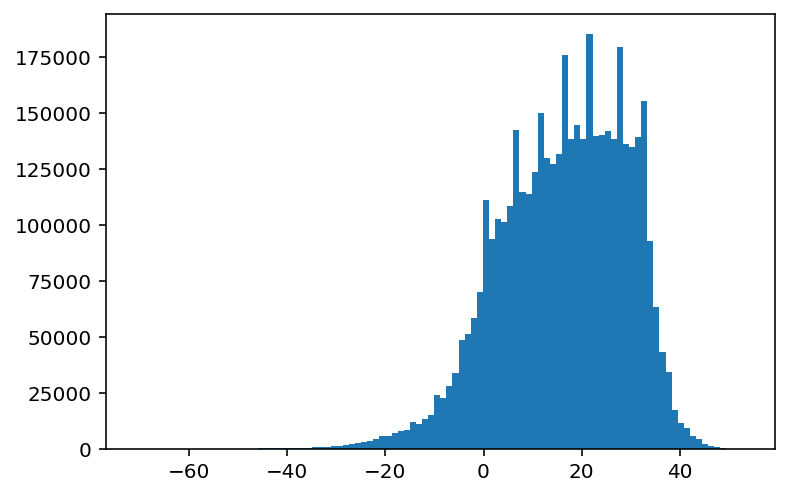

In [19]:
# _always_ check for outliers
with open('2019_TMAX.csv') as f:
    reader = csv.reader(f)
    values = [int(line[3]) / 10 for line in reader if line[5] == '']

_ = plt.hist(values, bins=100)

In [20]:
values.sort()

In [21]:
values[:10]

[-70.8, -69.4, -68.5, -67.1, -66.5, -66.5, -66.2, -65.0, -65.0, -64.9]

In [22]:
!grep ,-708 2019_TMAX.csv | head

AYW00090001,20190802,TMAX,-708,,,S,


In [ ]:
# that's "Amundsen-Scott" (Antarctica)
# https://geographic.org/global_weather/antarctica/amundsen_scott_001.html
# so maybe it could be right

In [23]:
values[-10:]

[50.3, 50.3, 50.3, 50.4, 50.8, 50.8, 50.8, 51.1, 51.7, 53.2]

In [24]:
!grep ,532 2019_TMAX.csv | head

SF002760720,20191129,TMAX,532,,,S,


In [ ]:
# that's South Africa, so maybe it's possible?

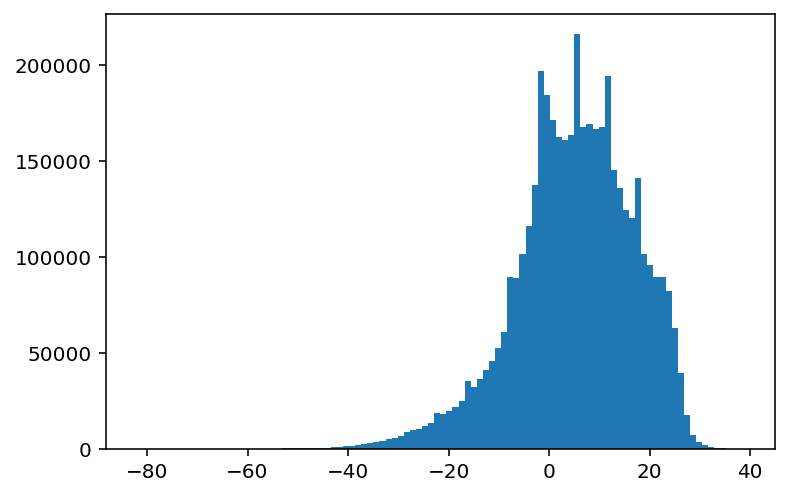

In [25]:
# _always_ check for outliers
with open('2019_TMIN.csv') as f:
    reader = csv.reader(f)
    values = [int(line[3]) / 10 for line in reader if line[5] == '']

_ = plt.hist(values, bins=100)

In [26]:
values.sort()

In [27]:
values[:10]

[-82.2, -80.0, -79.5, -79.5, -78.7, -78.6, -77.9, -77.6, -77.5, -77.4]

In [28]:
!grep ,-822 2019_TMIN.csv | head

AYM00089606,20190608,TMIN,-822,,,S,


In [ ]:
# Vostok, Antarctica

In [29]:
values[-10:]

[36.4, 36.5, 36.7, 36.7, 36.9, 37.0, 37.2, 37.4, 37.8, 38.9]

In [30]:
!grep ,389 2019_TMIN.csv | head

USC00042319,20190723,TMIN,389,,,7,2400


In [ ]:
# Death Valley

In [ ]:
# Okay, so maybe we can get on with it!

In [31]:
stations = {}

with open('2019_TMAX.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('maxes', []).append(value)

with open('2019_TMIN.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('mins', []).append(value)

In [32]:
len(stations)

13946

In [33]:
low_data = [station for station, data in stations.items()
            if len(data.get('maxes', [])) < 360 or
               len(data.get('mins', [])) < 360]

In [34]:
len(low_data)

6651

In [35]:
for station in low_data:
    del stations[station]

In [36]:
len(stations)

7295

In [39]:
cold, hot = 4, 27

In [65]:
scores = []
for station, data in stations.items():
    heat = [(temp - hot)**2 if temp > hot else 0
            for temp in data['maxes']]
    heat = (sum(heat) / len(heat))**0.5
    cool = [(temp - cold)**2 if temp < cold else 0
            for temp in data['mins']]
    cool = (sum(cool) / len(cool))**0.5
    scores.append([station, heat, cool, heat + cool])

In [66]:
len(scores)

7295

In [67]:
scores.sort(key=lambda line: line[3])

In [68]:
scores[:10]

[['ASN00091245', 0.0, 0.0, 0.0],
 ['USR0000HKMO',
  0.04316264239629149,
  0.007402332101976059,
  0.050564974498267544],
 ['USR0000HPTW', 0.0, 0.08159371450409245, 0.08159371450409245],
 ['ASN00092123', 0.13455257561412792, 0.0, 0.13455257561412792],
 ['SPE00119819',
  0.026689487951687803,
  0.11029226428740974,
  0.13698175223909753],
 ['SPE00120431', 0.17752507291971892, 0.0, 0.17752507291971892],
 ['ASN00069137', 0.24917446114702868, 0.0, 0.24917446114702868],
 ['USR0000CSBB', 0.2599789243302049, 0.0, 0.2599789243302049],
 ['NLE00113670', 0.0, 0.26514561622285554, 0.26514561622285554],
 ['USW00093245',
  0.015767649936829137,
  0.25632494872493977,
  0.27209259866176894]]

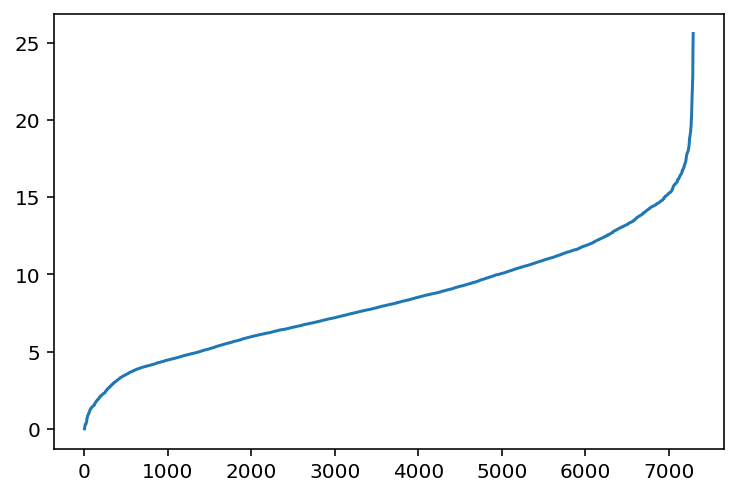

In [69]:
# total
plt.plot([line[3] for line in scores])

In [ ]:
# _very_ few places are habitable!

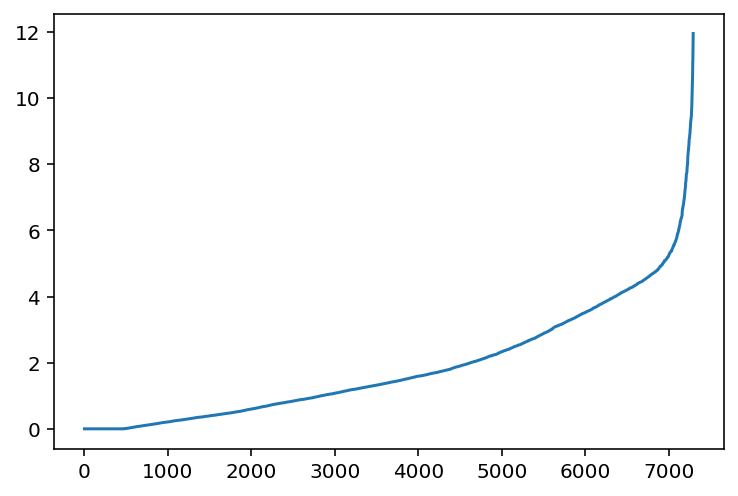

In [71]:
# heat
scores.sort(key=lambda line: line[1])
plt.plot([line[1] for line in scores])

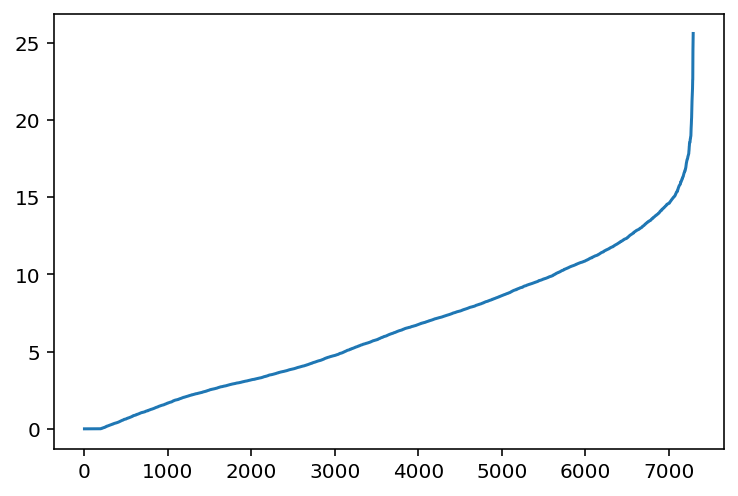

In [73]:
# cool
scores.sort(key=lambda line: line[2])
plt.plot([line[2] for line in scores])

In [ ]:
# definitely more violation for cold...
# should I adjust the targets?

In [74]:
!head ghcnd-stations.txt

ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       
ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    
AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196
AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194
AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217
AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218
AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930
AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938
AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948
AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990


In [96]:
locations = {}
with open('ghcnd-stations.txt') as f:
    for line in f:
        line = line.split()
        locations[line[0]] = [float(line[1]), float(line[2]), ' '.join(line[4:])]

In [97]:
list(locations.items())[:3]

[('ACW00011604', [17.1167, -61.7833, 'ST JOHNS COOLIDGE FLD']),
 ('ACW00011647', [17.1333, -61.7833, 'ST JOHNS']),
 ('AE000041196', [25.333, 55.517, 'SHARJAH INTER. AIRP GSN 41196'])]

In [98]:
results = []
for line in scores:
    if line[0] not in locations:
        continue
    results.append(line + locations[line[0]])

In [99]:
results[:3]

[['ASN00091245', 0.0, 0.0, 0.0, -40.6828, 144.69, 'CAPE GRIM BAPS 94954'],
 ['ASN00092123',
  0.13455257561412792,
  0.0,
  0.13455257561412792,
  -40.7292,
  148.125,
  'SWAN ISLAND 95985'],
 ['SPE00120431',
  0.17752507291971892,
  0.0,
  0.17752507291971892,
  27.8189,
  -17.8889,
  'HIERRO/AEROPUERTO 60001']]

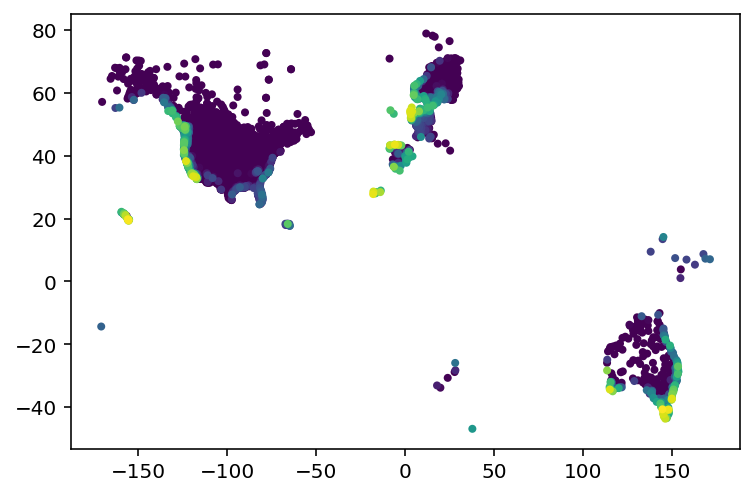

In [111]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[5 - line[3] if line[3] < 5 else 0 for line in results],
            marker='.')

In [112]:
# how did I lose all of Africa, Asia, etc.!
# are they not in the data, or just don't have as many days?

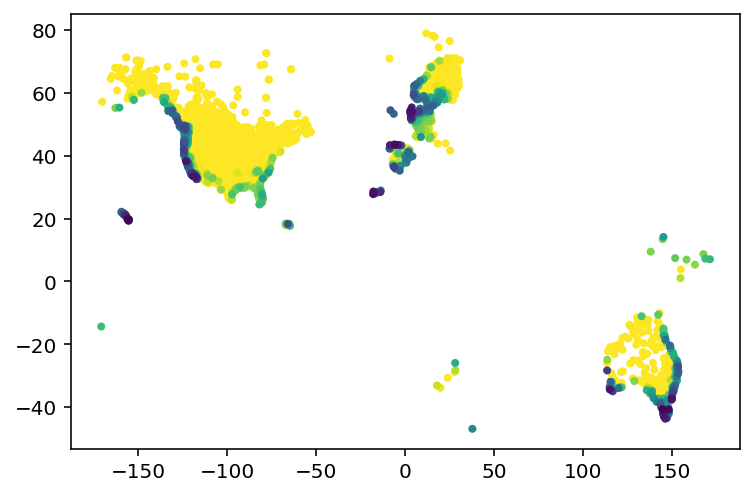

In [113]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[line[3] if line[3] < 5 else 5 for line in results],
            marker='.')